# Global Wine Markets 2015

![my Image caption](1.jpg)

## 📖 Background

With the end of year holidays approaching, many people like to relax or party with a glass of wine. That makes wine an important industry in many countries. Understanding this market is important to the livelihood of many people. 

You work at a multinational consumer goods organization that is considering entering the wine production industry. Managers at your company would like to understand the market better before making a decision.

## 💾 The data

This dataset is a subset of the University of Adelaide's [Annual Database of Global Wine Markets](https://universityofadelaide.app.box.com/s/eqpjqyq8o3mfy7139cr4pn76iolr1o1w).

The dataset consists of a single CSV file, `data/wine.csv`.

Each row in the dataset represents the wine market in one country. There are 34 metrics for the wine industry covering both the production and consumption sides of the market.

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

wine = pd.read_csv("data/wine.csv")
wine.head()

,Region,Country,Vine Area ('000 ha),Cropland under vines (%),Wine produced (ML),Wine consumed (ML),Wine consumed (l/capita),Wine expenditure (US$m 2015),Per capita wine expenditure (US$ 2015),Population (millions),GDP (billion US$ real 1990),GDP per capita ('000 US$),Wine export vol. (ML),Wine import vol. (ML),Value of wine exports (US$ mill),Value of wine imports (US$ mill),Bottled still wine exports (ML),Bottled still wine imports (ML),Sparkling wine exports (ML),Sparkling wine imports (ML),Bulk wine exports (ML),Bulk wine imports (ML),Unit value exports (US$/litre),Unit value imports (US$/litre),% of global prod'n volume,% of global cons'n volume,% of '15 global wine expend.,Wine as % of alcohol cons'n volume,Exports as % of prod'n volume,Imports as % of cons'n volume,Wine self- suff. (%),% of world export volume,% of world export value,% of world import volume,% of world import value,Index of wine comp. advant.
0,WEX,France,776.333333,3.922786,4683.800000,2735.634204,41.285828,31509.75,491.877833,66.598333,1485.799763,22.309864,1443.880333,733.410000,9523.900892,804.983546,1028.906283,114.325459,183.356150,24.507020,230.035580,578.283163,6.593657,1.104072,17.199432,11.143770,10.051559,57.142857,30.830762,26.839424,171.226668,13.573303,28.751303,6.902188,2.418984,9.290973
1,WEX,Italy,691.666667,7.707488,4905.166667,2113.333333,34.247205,16312.00,268.243723,61.708333,1101.449173,17.849278,2082.886317,235.247115,6378.417771,367.280676,1200.157875,22.921098,285.067024,6.380161,530.782946,201.589180,3.059268,1.616854,18.021110,8.612355,5.235904,63.672627,42.712428,11.253875,232.125798,19.592993,19.246379,2.208904,1.101308,6.774277
2,WEX,Portugal,197.000000,9.496021,642.300000,445.350809,42.812548,3175.50,305.252869,10.384049,139.686514,13.452028,280.791000,209.132843,861.459667,139.208719,217.483530,41.209292,1.534761,5.356422,61.150281,157.760644,3.065915,0.665380,2.357439,1.812032,1.025998,63.319239,43.917690,52.183251,139.261002,2.639968,2.598039,1.964438,0.416099,7.567731
3,WEX,Spain,975.666667,5.416570,3883.333333,700.000000,15.131956,5455.95,117.386251,46.127138,746.514895,16.183854,2349.976000,66.492626,3181.533500,194.807144,853.157148,33.812108,154.622949,9.066705,1332.269437,15.585197,1.323544,3.033953,14.266654,2.848142,1.761800,23.204420,60.585810,7.217286,564.285714,22.072897,9.553242,0.626462,0.585837,5.547239
4,WEM,Austria,44.407333,3.077699,207.289667,247.429000,29.004304,4444.70,520.536520,8.553834,215.358360,25.176822,49.080000,75.948500,172.453000,240.626500,40.459504,38.404903,0.925342,16.859850,7.727219,20.561282,3.511161,3.159698,0.760849,0.998597,1.422595,33.778543,23.790466,30.697999,86.205518,0.461520,0.519954,0.700000,0.700000,0.557619


In [165]:
wine.rename(columns = {wine.columns[2] : 'Vine Area'}, inplace=True)

### We will conduct several standard studies of our data. Let's see how many missing values and look at the data types.

In [166]:
wine.drop_duplicates()
display(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Region                                  52 non-null     object 
 1   Country                                 52 non-null     object 
 2   Vine Area                               52 non-null     float64
 3   Cropland under vines (%)                50 non-null     float64
 4   Wine produced (ML)                      40 non-null     float64
 5   Wine consumed (ML)                      52 non-null     float64
 6   Wine consumed (l/capita)                51 non-null     float64
 7   Wine expenditure (US$m 2015)            51 non-null     float64
 8   Per capita wine expenditure (US$ 2015)  51 non-null     float64
 9   Population (millions)                   51 non-null     float64
 10  GDP (billion US$ real 1990)             47 non-null     float64


None

In [167]:
display(wine.describe())


,Vine Area,Cropland under vines (%),Wine produced (ML),Wine consumed (ML),Wine consumed (l/capita),Wine expenditure (US$m 2015),Per capita wine expenditure (US$ 2015),Population (millions),GDP (billion US$ real 1990),GDP per capita ('000 US$),Wine export vol. (ML),Wine import vol. (ML),Value of wine exports (US$ mill),Value of wine imports (US$ mill),Bottled still wine exports (ML),Bottled still wine imports (ML),Sparkling wine exports (ML),Sparkling wine imports (ML),Bulk wine exports (ML),Bulk wine imports (ML),Unit value exports (US$/litre),Unit value imports (US$/litre),% of global prod'n volume,% of global cons'n volume,% of '15 global wine expend.,Wine as % of alcohol cons'n volume,Exports as % of prod'n volume,Imports as % of cons'n volume,Wine self- suff. (%),% of world export volume,% of world export value,% of world import volume,% of world import value,Index of wine comp. advant.
count,52.000000,50.000000,40.000000,52.000000,51.000000,51.000000,51.000000,51.000000,47.000000,47.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51.000000,52.000000,52.000000,39.000000,52.000000,51.000000,51.000000,38.000000,52.000000,39.000000,52.000000,52.000000,52.000000,52.000000,48.000000
mean,145.980968,1.616730,721.017077,474.247048,14.839284,5559.079412,161.362854,143.098310,1290.248617,16.362401,206.337734,216.357220,652.258627,717.796816,109.349668,110.610011,14.325689,14.448464,78.751010,80.445072,6.582877,4.733277,2.616765,1.885340,1.933910,26.976708,37.812147,60.303696,116.118483,1.906453,1.921786,1.867216,1.938818,2.881781
std,241.261031,2.555811,1240.011005,720.048048,13.603052,9531.255647,168.704798,324.129596,3020.222579,9.260844,484.606720,399.627174,1635.196426,1382.833133,251.889860,185.708500,50.423268,26.639278,210.671518,162.566598,12.818297,4.028103,4.610308,2.868424,3.254284,18.612628,52.065639,62.523574,124.093989,4.539704,4.910789,3.197833,3.302775,6.144620
min,0.000000,0.000000,4.175000,4.975000,0.020768,287.100000,0.252191,4.011529,20.141966,3.806105,0.075116,0.184000,0.294957,1.495500,0.049776,0.059114,0.000010,0.085762,0.007446,0.003261,0.668475,0.665380,0.015325,0.020113,0.101462,0.096454,0.517308,0.043671,0.307160,0.000707,0.000884,0.001538,0.000000,0.000424
25%,7.652000,0.044582,50.176750,63.406591,1.428286,709.825000,22.576114,9.174029,135.368916,8.765689,4.288221,12.871868,13.272110,30.036667,1.480710,6.364833,0.110886,0.892621,0.453406,1.830001,2.091762,2.301390,0.176539,0.257987,0.247378,9.082417,5.974985,10.643434,46.179653,0.037177,0.033706,0.099105,0.097490,0.054813
50%,43.903667,0.449854,185.286500,223.423917,12.712069,1726.100000,92.709782,31.306667,296.664935,13.477951,21.678611,59.535781,72.646833,235.156084,8.276046,33.267269,0.568790,3.882696,4.373789,15.585197,3.144871,3.494912,0.599916,0.909251,0.672740,28.105168,23.307619,34.422039,86.205518,0.203612,0.219578,0.560377,0.695525,0.348958
75%,134.584000,1.939848,932.169706,432.249383,23.234913,4495.350000,284.373682,88.722083,1101.232190,24.444602,121.605386,237.077292,469.453911,751.471136,43.748816,106.674185,3.565557,14.630390,62.816718,82.732734,4.614487,5.619116,2.833881,1.758725,1.635764,39.831492,46.358092,100.698587,134.758434,1.021164,1.422999,2.025555,2.254831,0.946059
max,975.666667,9.627229,4905.166667,3390.185565,44.284392,41822.450000,658.628039,1375.935871,15104.211221,34.677913,2349.976000,1946.227000,9523.900892,7608.140000,1200.157875,834.636992,285.067024,136.989775,1332.269437,880.755481,80.705957,22.452281,18.021110,13.682429,14.805126,63.672627,292.637527,287.014618,564.285714,22.072897,28.751303,14.252729,17.075070,27.402233


In [168]:
def percent_hbar(df, old_threshold=None):
    percent_of_nulls = (df.isnull().sum()/len(df)*100).sort_values().round(2)
    threshold = percent_of_nulls.mean()
    ax = percent_of_nulls.plot(kind='barh', figsize=(20, 16), title='% of NaN (from {} lines)'.format(len(df)), 
                               color='#86bf91', legend=False, fontsize=17)
    ax.set_xlabel('Count of NaN')
    dict_percent = dict(percent_of_nulls)
    i = 0
    for k in dict_percent:
        color = 'blue'
        if dict_percent[k] > 0:
            if dict_percent[k] > threshold:
                color = 'red'
            ax.text(dict_percent[k]+0.1, i + 0.09, str(dict_percent[k])+'%', color=color, 
                    fontweight='bold', fontsize='large')
        i += 0.98
    if old_threshold is not None:
        plt.axvline(x=old_threshold,linewidth=1, color='r', linestyle='--')
        ax.text(old_threshold+0.3, .10, '{0:.2%}'.format(old_threshold/100), color='r', fontweight='bold', fontsize='large')
        plt.axvline(x=threshold,linewidth=1, color='green', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='green', fontweight='bold', fontsize='large')
    else:
        plt.axvline(x=threshold,linewidth=1, color='r', linestyle='--')
        ax.text(threshold+0.3, .7, '{0:.2%}'.format(threshold/100), color='r', fontweight='bold', fontsize='large')
    ax.set_xlabel('')
    return ax, threshold


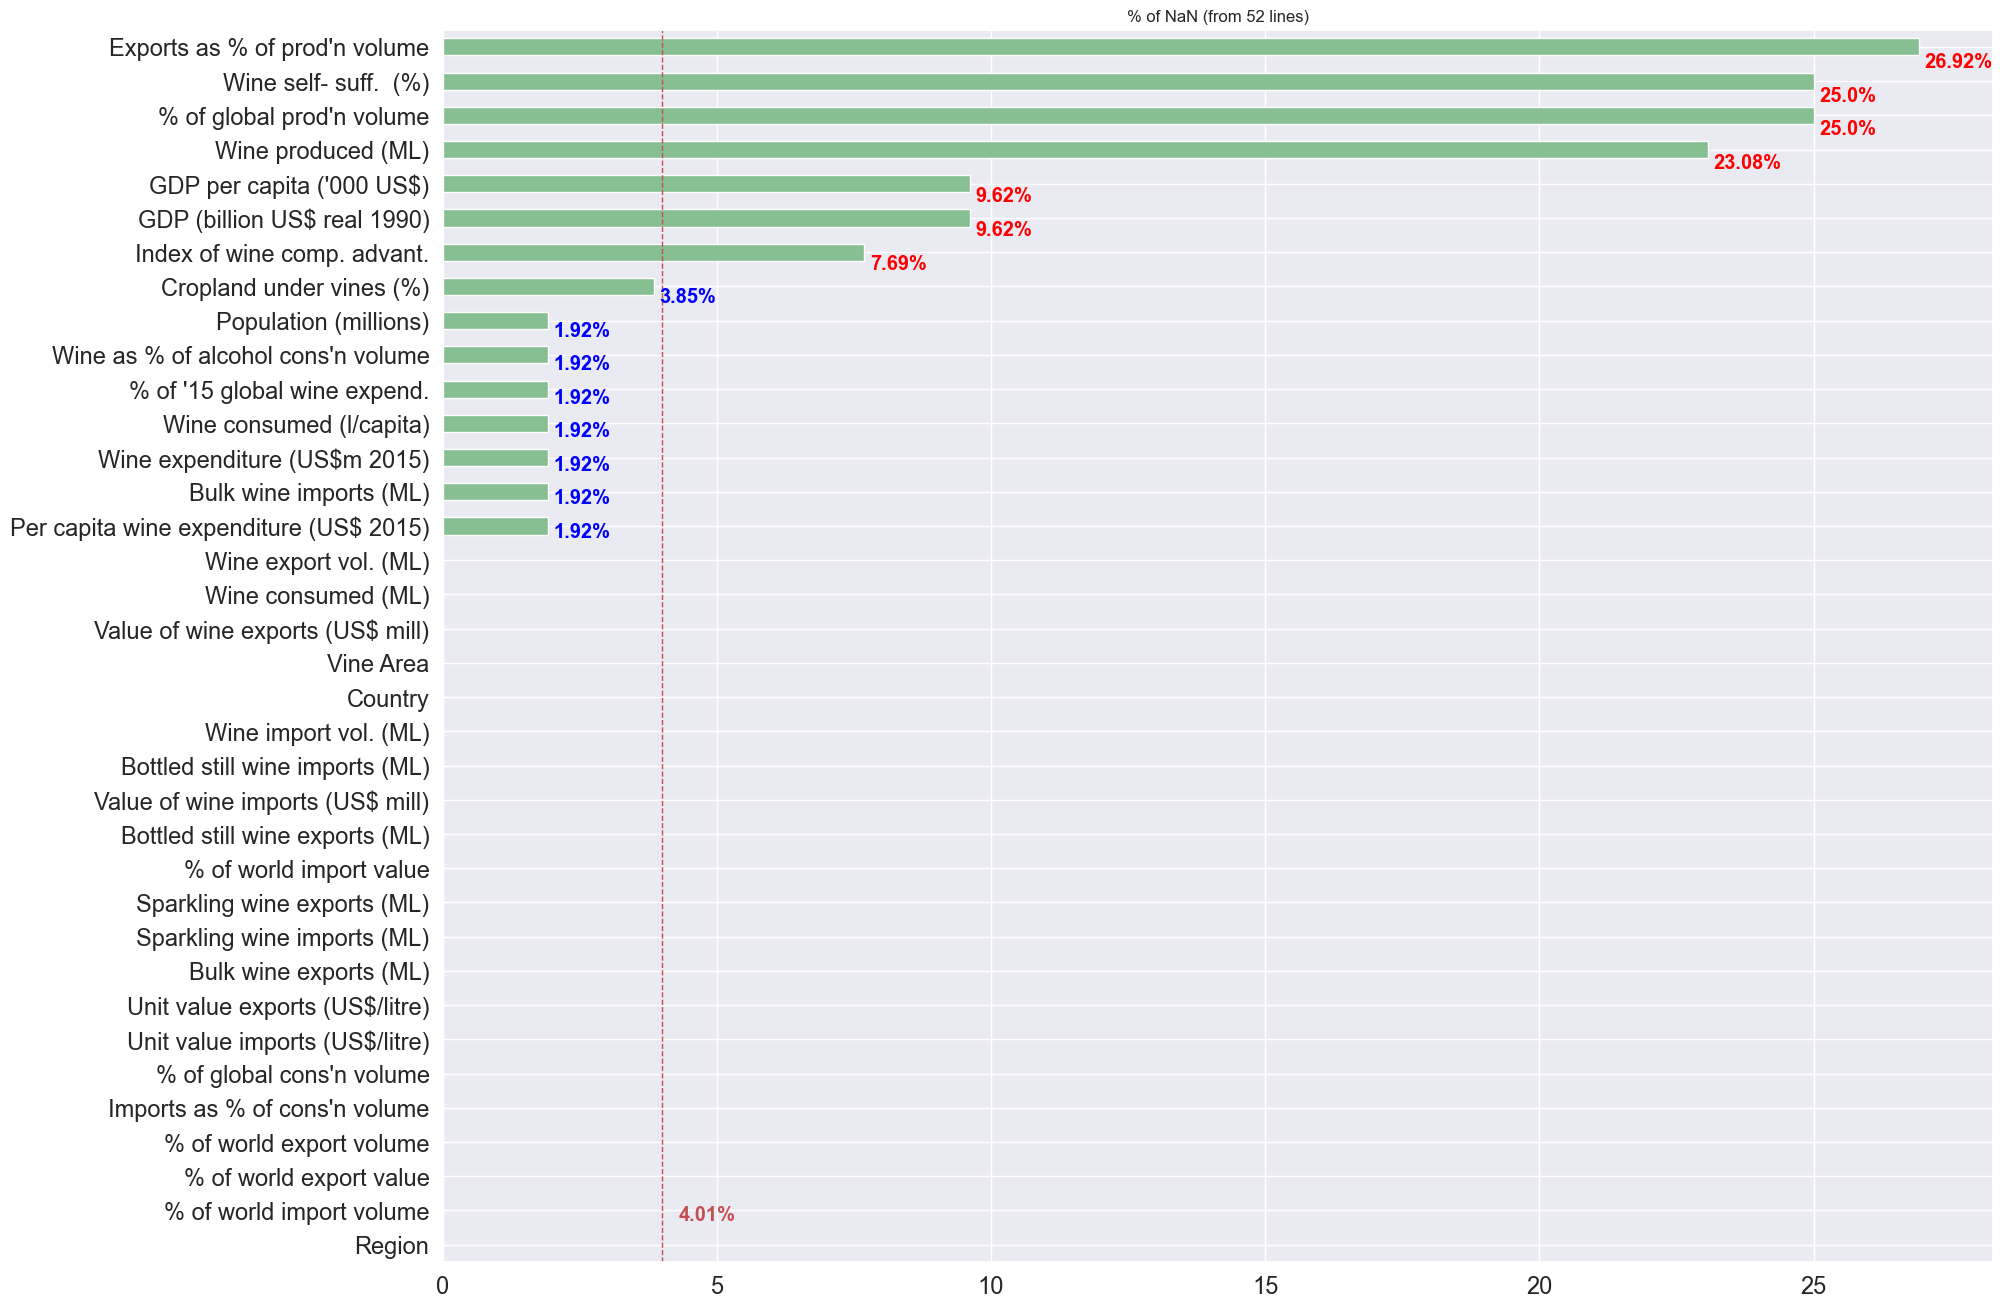

In [169]:
plot, threshold = percent_hbar(wine)


In [170]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(wine.columns):
    variables.loc[i] = [var, wine[var].nunique(), wine[var].unique().tolist()]
variables.set_index('Variable', inplace=True)    
variables

,Number of unique values,Values
Variable,,
Region,8,"[WEX, WEM, ECA, ANZ, USC, LAC, AME, APA]"
Country,52,"[France, Italy, Portugal, Spain, Austria, Bel-..."
Vine Area,45,"[776.3333333333334, 691.6666666666666, 197.0, ..."
Cropland under vines (%),43,"[3.922786316824509, 7.707488214011622, 9.49602..."
Wine produced (ML),40,"[4683.799999999999, 4905.166666666667, 642.300..."
Wine consumed (ML),52,"[2735.634204440729, 2113.333333333333, 445.350..."
Wine consumed (l/capita),51,"[41.28582829098946, 34.24720546547007, 42.8125..."
Wine expenditure (US$m 2015),51,"[31509.75, 16312.0, 3175.5, 5455.950000000001,..."
Per capita wine expenditure (US$ 2015),51,"[491.8778333580426, 268.24372305875784, 305.25..."


In [171]:
wine.fillna(-1,inplace=True)


### Let's look at the correlation between our data

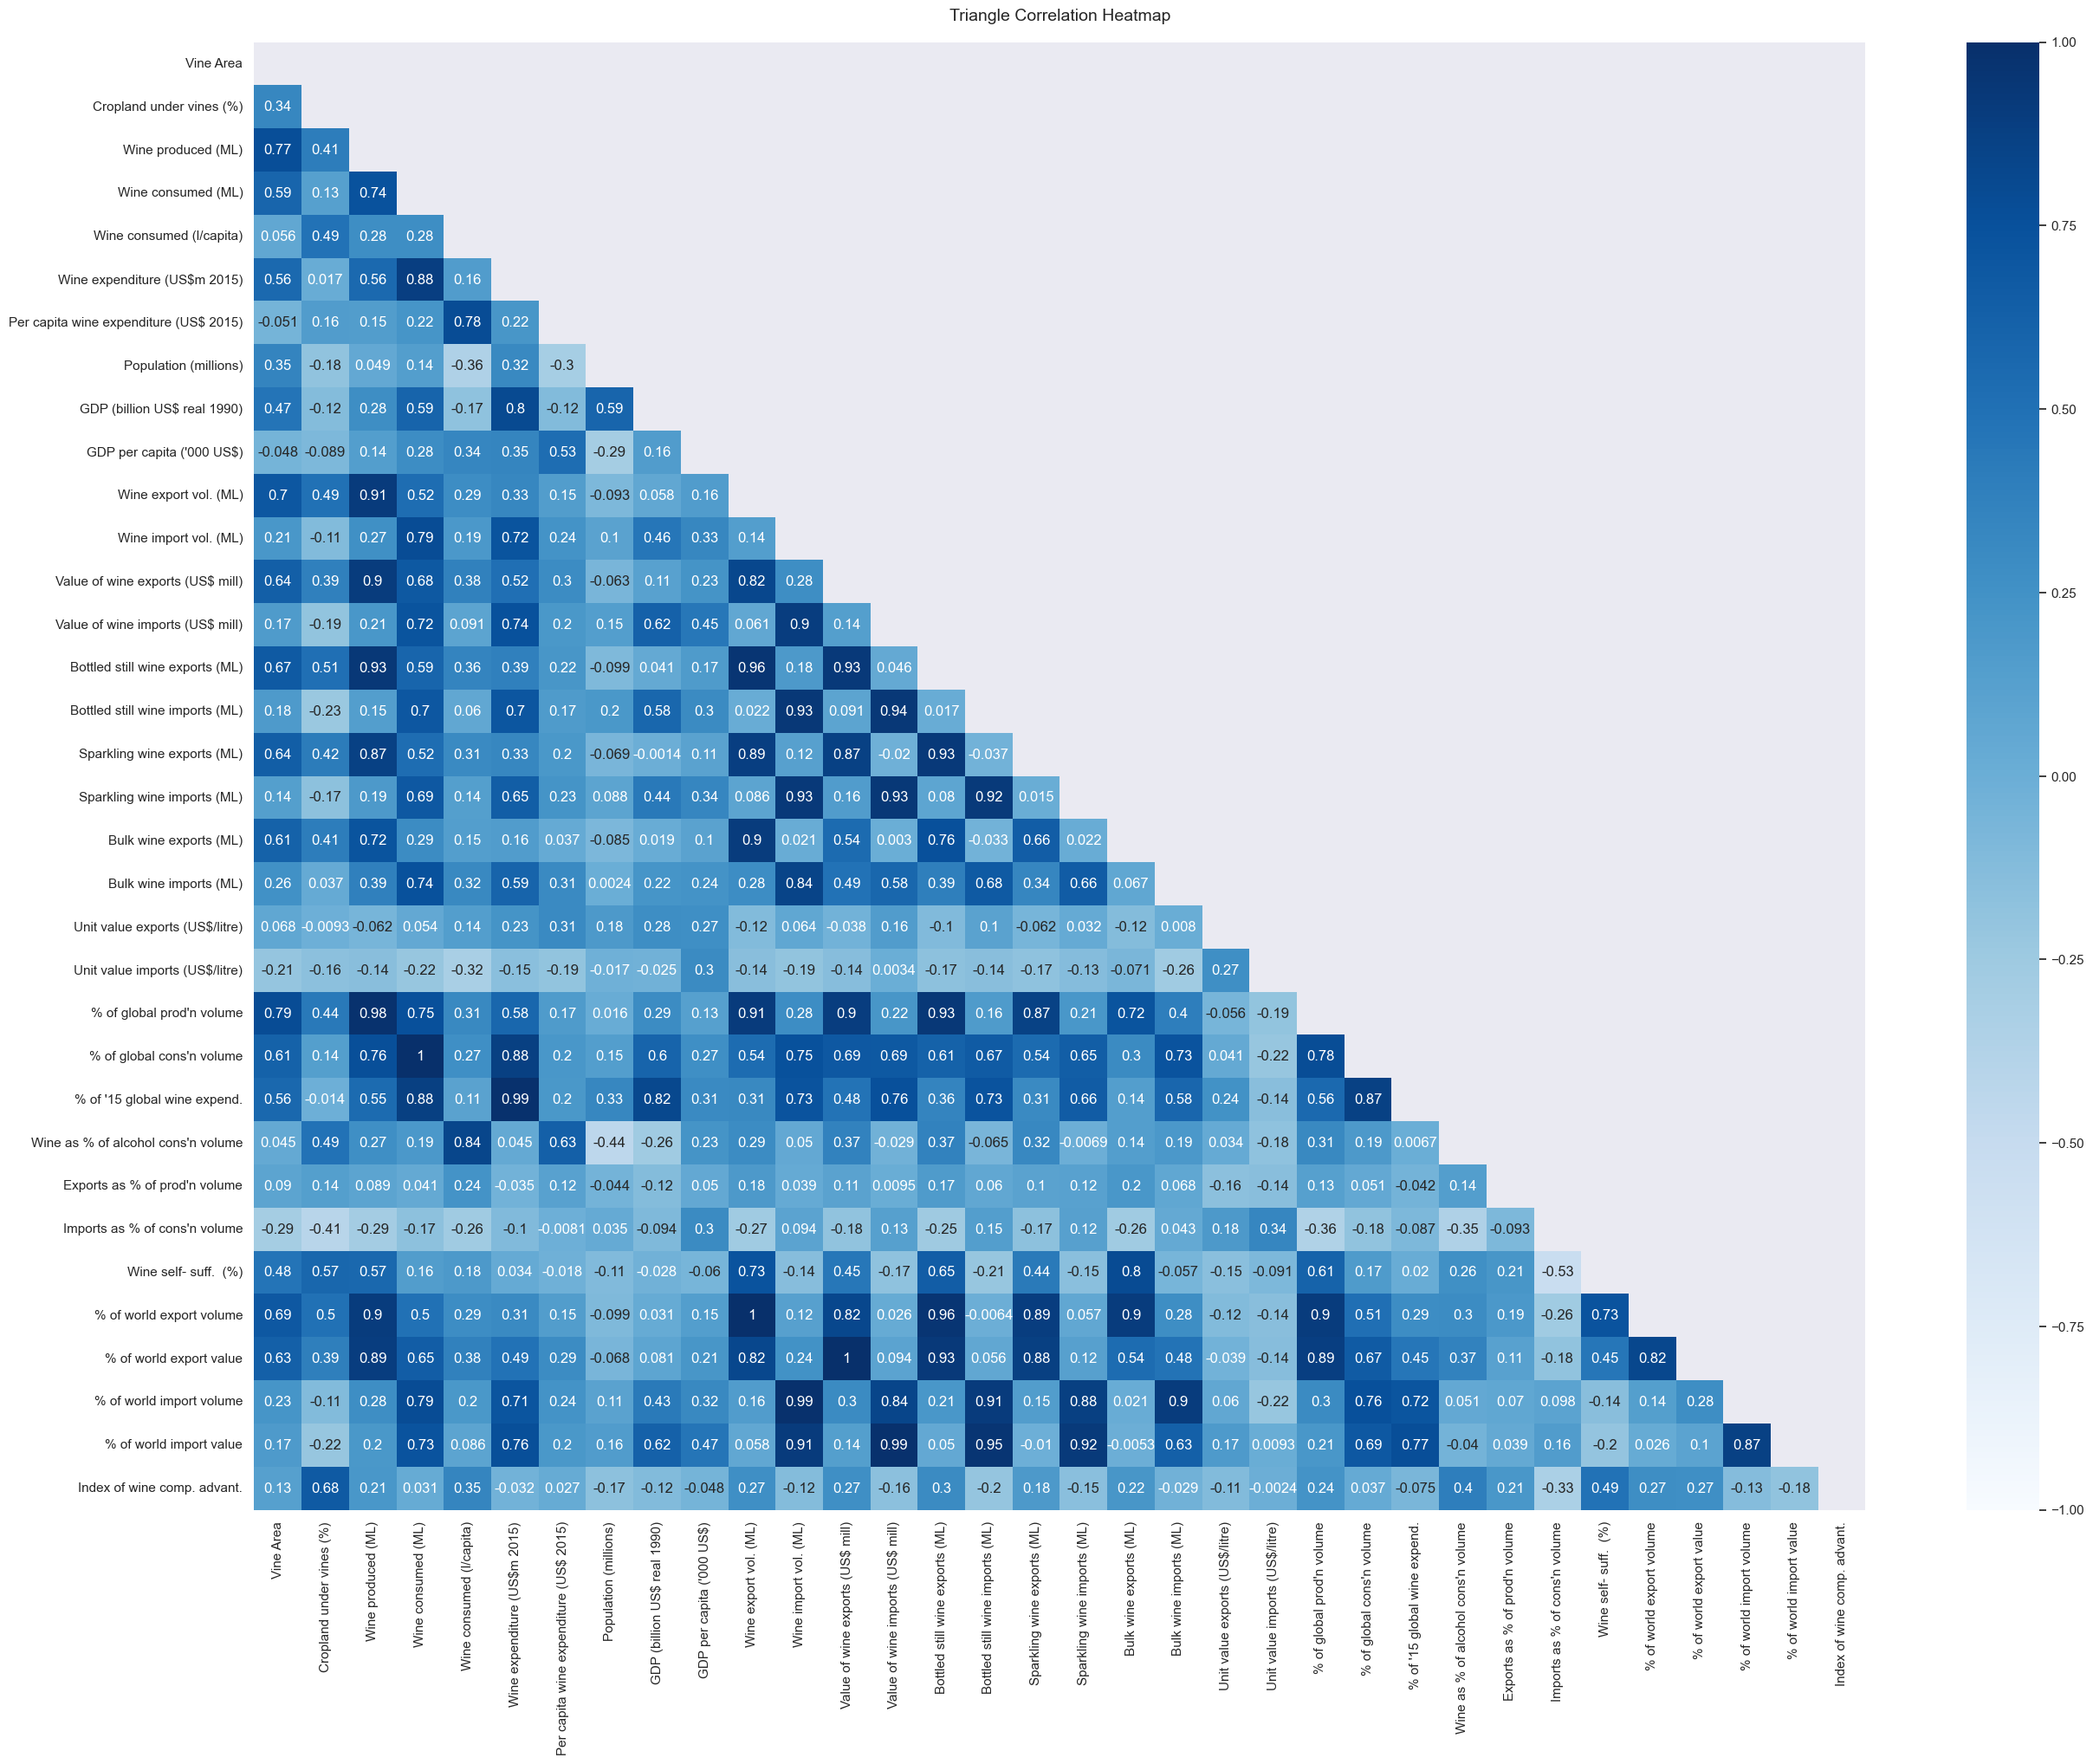

In [172]:
plt.figure(figsize=(30, 22))
mask = np.triu(np.ones_like(wine.corr(), dtype=np.bool))
heatmap = sns.heatmap(wine.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=18);

## Correlations confirmed the obvious things:
### 1. The area of vineyards strongly affects the amount of wine produced and its export to other countries, as well as the consumption of wine;
### 2. Wine consumption is related to its costs;

## Let's look at the countries with the largest wine production

In [173]:
def barplot_best_10(df,X,Y,xlabel,ylabel,N,title):
    df=df.sort_values(Y,ascending= True)
    df=df[df[Y]>1]
    n = list(df[X])
    s = list(df[Y].astype(int))
    plt.figure(figsize=(16, 8))
    plt.xticks(rotation=75, fontsize=12);
    ax = plt.bar(n,s)
    plt.title(title,fontsize=15)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i in range(len(s)):
        plt.annotate(str(s[i]), xy=(n[i],s[i]), ha='center', va='bottom',rotation=75)
    for i in range(len(s)-N,len(s)):
        ax.patches[i].set_facecolor('#aa3333')
    plt.show()
    
    return  n[len(n)-N-1:]

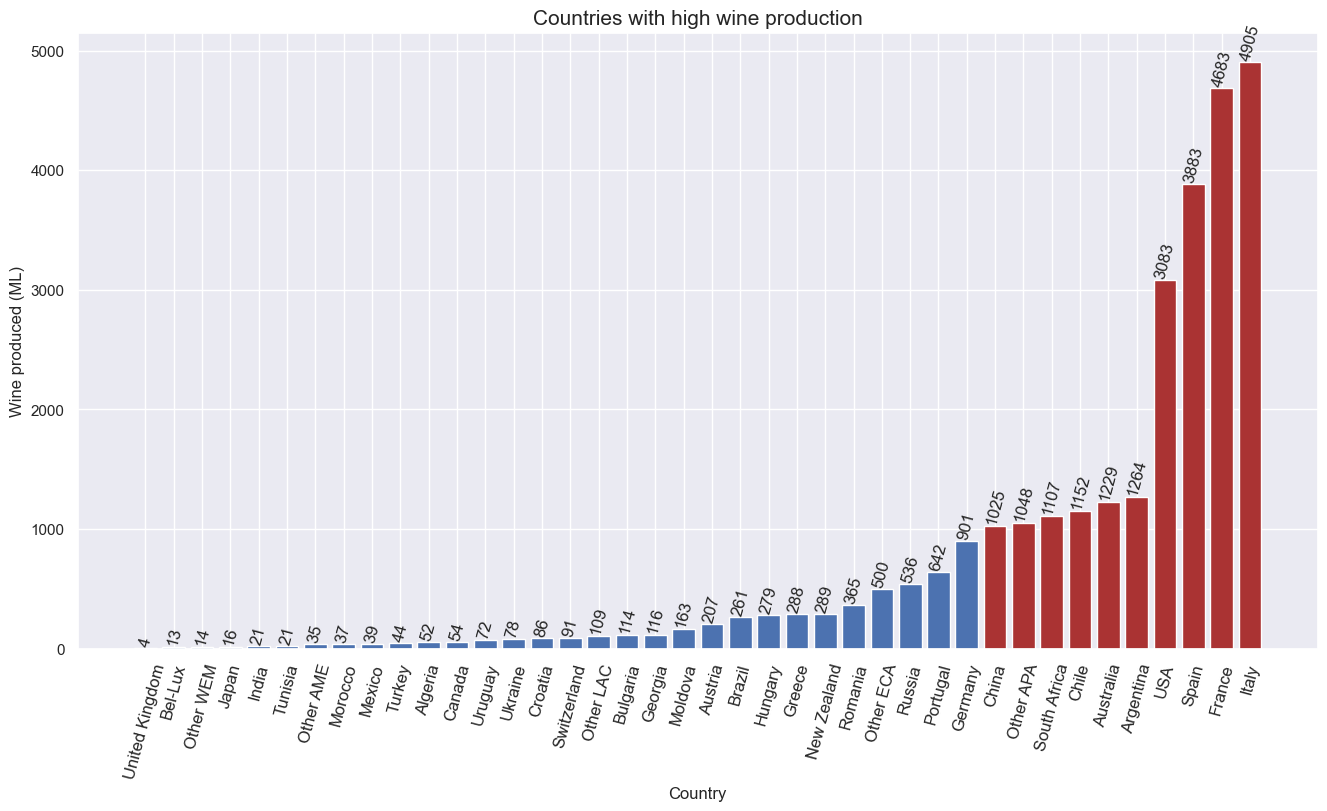

In [174]:
top_10_wine_prod = barplot_best_10(wine,'Country','Wine produced (ML)','Country','Wine produced (ML)',10,'Countries with high wine production')


### We will work with ten countries with the largest wine production

In [175]:
df = wine[wine['Country'].isin(top_10_wine_prod)][:10]
df

,Region,Country,Vine Area,Cropland under vines (%),Wine produced (ML),Wine consumed (ML),Wine consumed (l/capita),Wine expenditure (US$m 2015),Per capita wine expenditure (US$ 2015),Population (millions),GDP (billion US$ real 1990),GDP per capita ('000 US$),Wine export vol. (ML),Wine import vol. (ML),Value of wine exports (US$ mill),Value of wine imports (US$ mill),Bottled still wine exports (ML),Bottled still wine imports (ML),Sparkling wine exports (ML),Sparkling wine imports (ML),Bulk wine exports (ML),Bulk wine imports (ML),Unit value exports (US$/litre),Unit value imports (US$/litre),% of global prod'n volume,% of global cons'n volume,% of '15 global wine expend.,Wine as % of alcohol cons'n volume,Exports as % of prod'n volume,Imports as % of cons'n volume,Wine self- suff. (%),% of world export volume,% of world export value,% of world import volume,% of world import value,Index of wine comp. advant.
0,WEX,France,776.333333,3.922786,4683.800000,2735.634204,41.285828,31509.75,491.877833,66.598333,1485.799763,22.309864,1443.880333,733.410000,9523.900892,804.983546,1028.906283,114.325459,183.356150,24.507020,230.035580,578.283163,6.593657,1.104072,17.199432,11.143770,10.051559,57.142857,30.830762,26.839424,171.226668,13.573303,28.751303,6.902188,2.418984,9.290973
1,WEX,Italy,691.666667,7.707488,4905.166667,2113.333333,34.247205,16312.00,268.243723,61.708333,1101.449173,17.849278,2082.886317,235.247115,6378.417771,367.280676,1200.157875,22.921098,285.067024,6.380161,530.782946,201.589180,3.059268,1.616854,18.021110,8.612355,5.235904,63.672627,42.712428,11.253875,232.125798,19.592993,19.246379,2.208904,1.101308,6.774277
3,WEX,Spain,975.666667,5.416570,3883.333333,700.000000,15.131956,5455.95,117.386251,46.127138,746.514895,16.183854,2349.976000,66.492626,3181.533500,194.807144,853.157148,33.812108,154.622949,9.066705,1332.269437,15.585197,1.323544,3.033953,14.266654,2.848142,1.761800,23.204420,60.585810,7.217286,564.285714,22.072897,9.553242,0.626462,0.585837,5.547239
8,WEM,Germany,100.660333,0.828847,901.166667,1894.332402,23.098654,15744.60,194.466197,81.991333,1802.702058,21.986495,373.790667,1516.104667,1147.211466,2987.032970,272.571684,567.687021,29.377393,64.210573,70.669616,880.755481,3.061821,1.967627,3.310323,7.721448,4.998544,28.105168,41.473156,80.326033,47.683255,3.515370,3.457947,14.252729,8.942469,0.421962
25,ANZ,Australia,133.478667,0.570849,1229.178667,552.169000,23.117484,7029.10,296.408980,23.884667,682.162702,28.560696,739.533333,88.540000,1671.103333,573.026933,323.845037,56.573439,11.851405,14.434451,410.747415,18.677513,2.260152,6.484059,4.517873,2.249552,2.285078,35.912214,60.262851,16.034856,222.548477,6.951345,5.052492,0.832696,1.718922,4.096116
28,USC,USA,574.533333,0.266277,3083.800000,3390.185565,10.574164,41822.45,130.592935,429.674088,14279.914552,33.234293,569.389667,1469.912000,2095.256333,7608.140000,231.892378,834.636992,4.995902,120.358392,181.984746,254.719252,3.681592,5.167854,11.329433,13.682429,14.805126,17.911116,13.641630,32.125325,89.984477,3.956548,4.690651,10.327175,17.075070,0.520831
29,LAC,Argentina,225.133333,0.563184,1264.566667,860.976990,20.032026,4006.50,92.709782,43.332260,473.592868,10.929337,265.413667,3.915140,825.491579,7.569528,192.569661,0.161149,3.953061,0.241031,68.613414,3.513391,3.110833,9.309842,4.634101,3.503121,1.509727,45.098039,21.804012,0.043671,176.299717,2.494530,2.495479,0.037230,0.023024,6.858389
31,LAC,Chile,140.197333,7.880412,1152.520667,225.800000,12.712069,1152.20,64.526067,17.970263,296.050422,16.474463,866.113333,2.300667,1850.670667,9.846333,482.706953,0.709768,4.508808,1.443454,373.534524,0.147168,2.142639,4.452486,4.228170,0.918729,0.407171,30.944858,76.012057,0.753322,537.643933,8.138523,5.596745,0.021682,0.029662,14.394248
37,AME,South Africa,122.566667,2.335849,1107.400000,427.882241,7.928289,2014.65,37.158270,54.719820,305.551979,5.583936,423.666667,2.588000,704.808333,28.548667,172.134209,1.225381,8.256774,0.836425,305.299678,0.525043,1.663

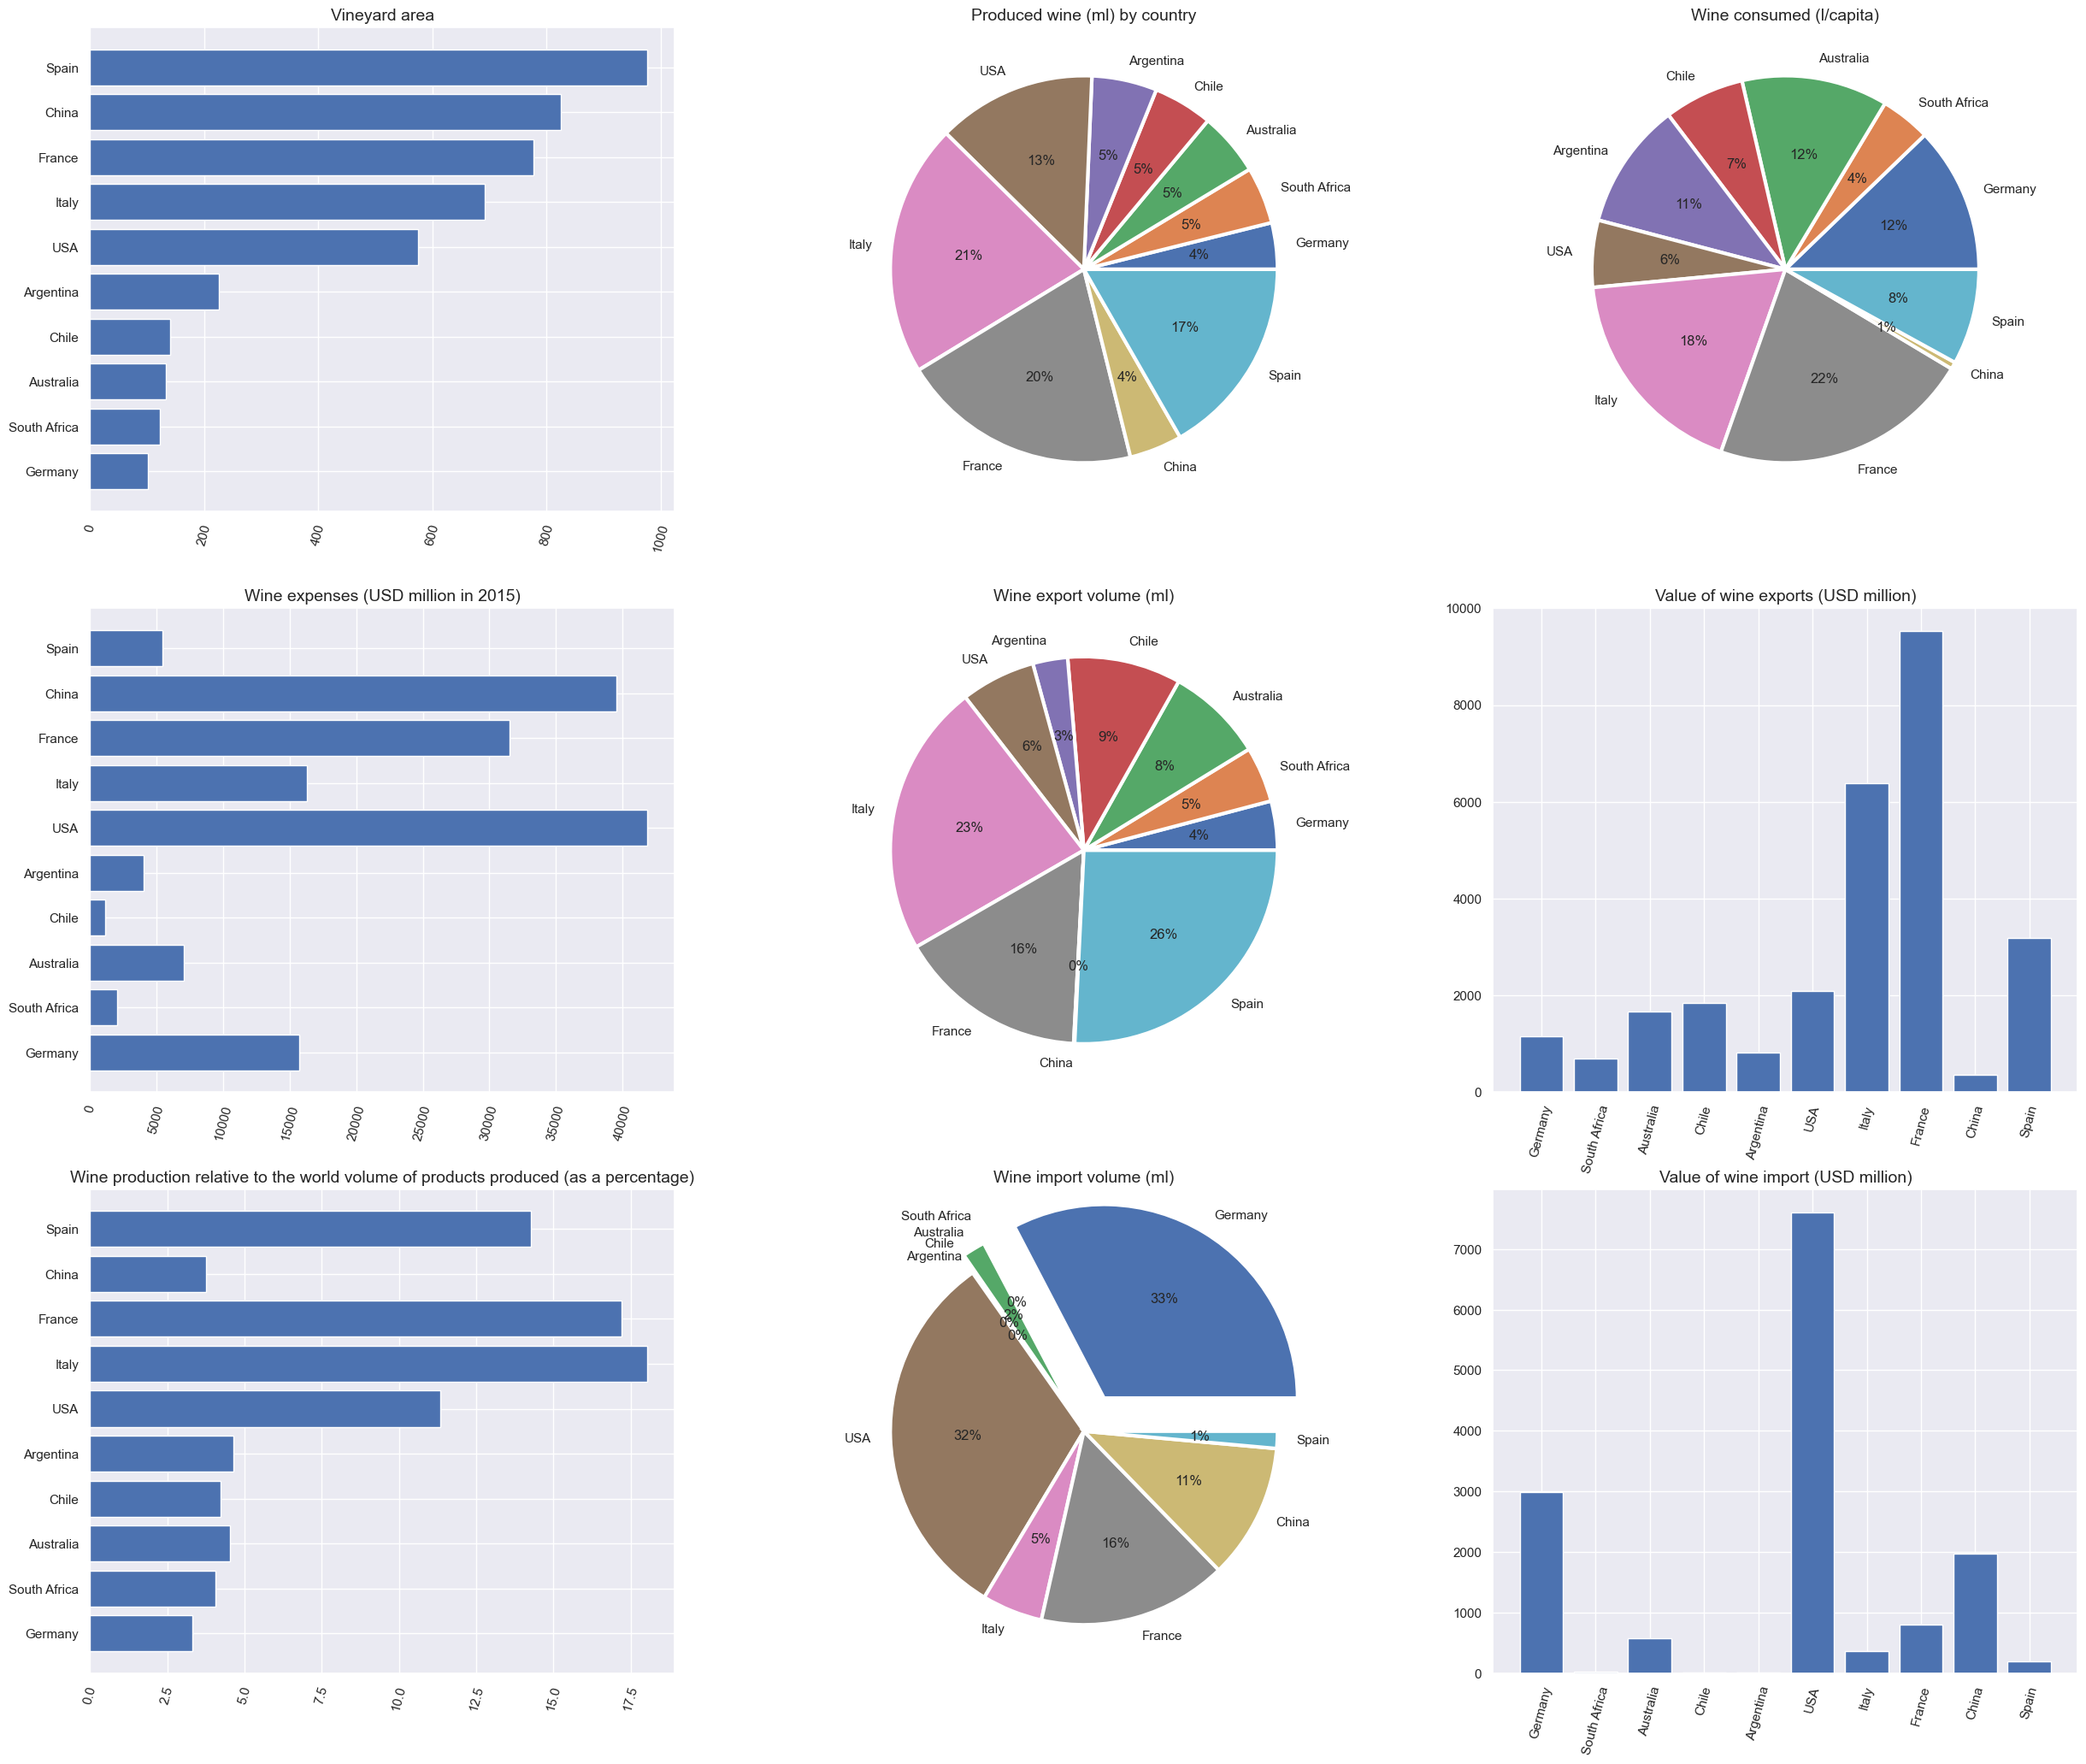

In [176]:
fig, axs = plt.subplots(nrows=3, ncols=3,figsize=(30, 25))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=75)
df = df.sort_values('Vine Area',ascending = True)
axs[0,0].barh(list(df['Country']),list(df['Vine Area']))
axs[0,1].pie(x=df['Wine produced (ML)'], autopct="%.f%%",labels =df['Country'],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'});
axs[0,2].pie(x=df['Wine consumed (l/capita)'], autopct="%.f%%",labels =df['Country'],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'});

axs[0,1].set_title("Produced wine (ml) by country", fontsize=14,loc = 'center');
axs[0,0].set_title("Vineyard area", fontsize=14,loc = 'center');
axs[0,2].set_title("Wine consumed (l/capita)", fontsize=14,loc = 'center');

axs[1,0].barh(list(df['Country']),list(df['Wine expenditure (US$m 2015)']))
axs[1,1].pie(x=df['Wine export vol. (ML)'], autopct="%.f%%",labels =df['Country'],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'});
axs[1,2].bar(list(df['Country']),list(df['Value of wine exports (US$ mill)']))

axs[1,0].set_title("Wine expenses (USD million in 2015)", fontsize=14,loc = 'center');
axs[1,1].set_title("Wine export volume (ml)", fontsize=14,loc = 'center');
axs[1,2].set_title("Value of wine exports (USD million)", fontsize=14,loc = 'center');

axs[2,0].barh(list(df['Country']),list(df["% of global prod'n volume"]))
sort_legend= True
axs[2,1].pie(x=df['Wine import vol. (ML)'], autopct="%.f%%",labels =df['Country'],wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},    explode=(0.2, 0.15, 0.1, 0.08,0, 0, 0, 0,0, 0,));
axs[2,2].bar(list(df['Country']),list(df['Value of wine imports (US$ mill)']))

axs[2,0].set_title("Wine production relative to the world volume of products produced (as a percentage)", fontsize=14,loc = 'center');
axs[2,1].set_title("Wine import volume (ml)", fontsize=14,loc = 'center');
axs[2,2].set_title("Value of wine import (USD million)", fontsize=14,loc = 'center')


plt.show()

## Of these 10 countries with the highest productivity of the wine industry , several conclusions can be drawn:
1. France and Italy are absolute leaders in the production and consumption of wine, as well as in its export to other countries;
2. This brings them a significant increase in the state budget;
3. Germany and the USA import approximately the same amount of wine, although in monetary terms, US imports are twice as large as Germany;
4. France, Spain and Italy account for almost 50% of the world's wine production! 
5. Lowest wine consumption in China and South Africa;
### France and Italy are rightfully considered the most popular wine regions

### Let's see how the top 10 countries will change if we take wine spending per capita

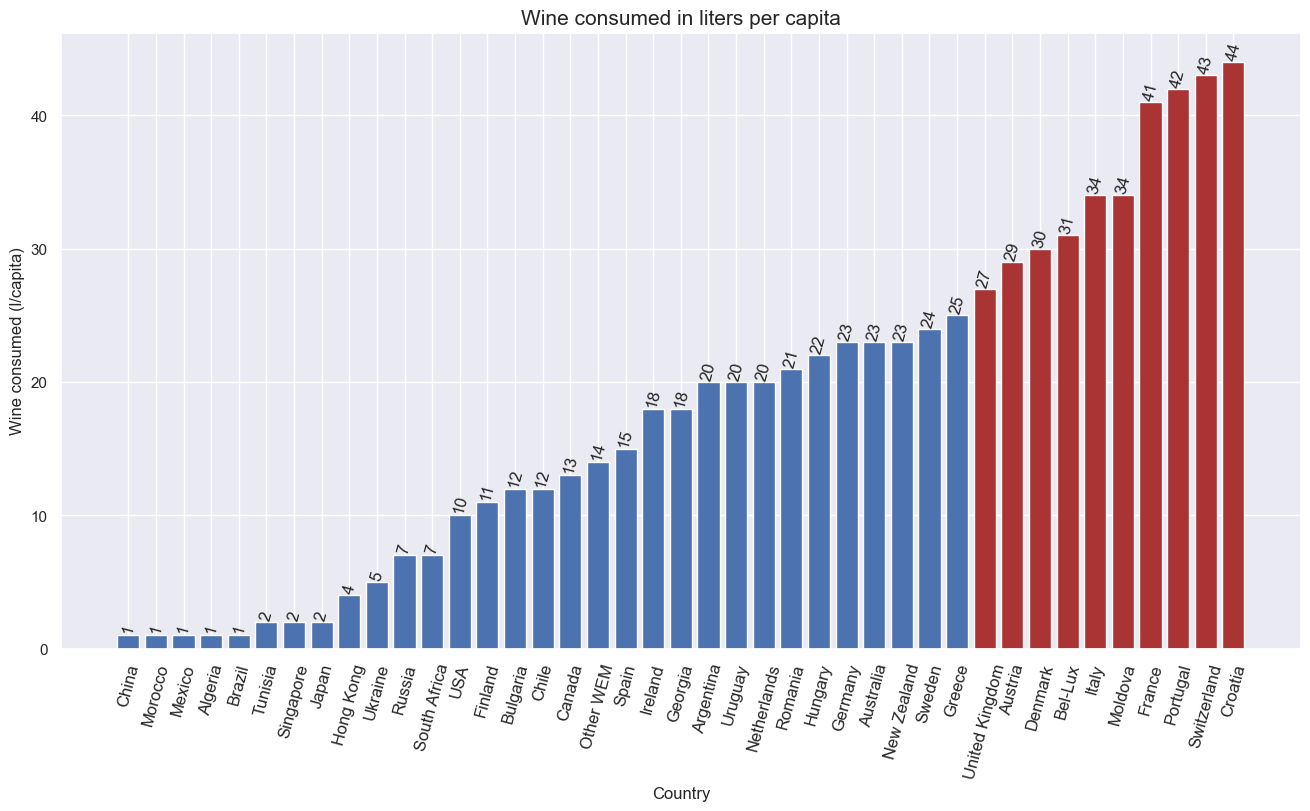

In [177]:
top_10_wine_cons = barplot_best_10(wine,'Country','Wine consumed (l/capita)','Country','Wine consumed (l/capita)',10,'Wine consumed in liters per capita')


The arrangement of countries has changed, but our leaders from the previous charts are also in the new list

In [184]:
wine['Total bottle export'] = wine['Bottled still wine exports (ML)']+wine['Sparkling wine exports (ML)'] 
wine['Total bottle import'] = wine['Bottled still wine imports (ML)']+wine['Sparkling wine imports (ML)'] 

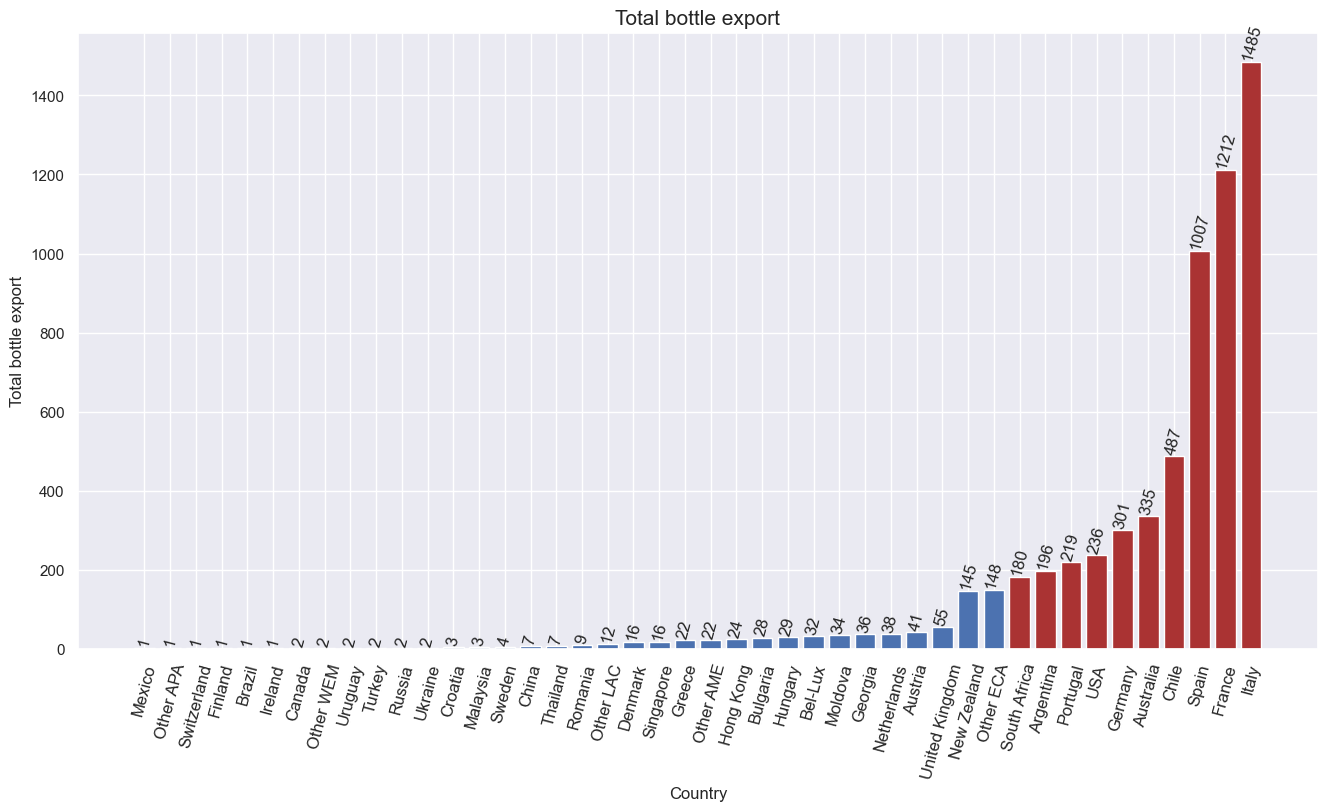

In [188]:
top_10_export = barplot_best_10(wine,'Country','Total bottle export','Country','Total bottle export',10,'Total bottle export')


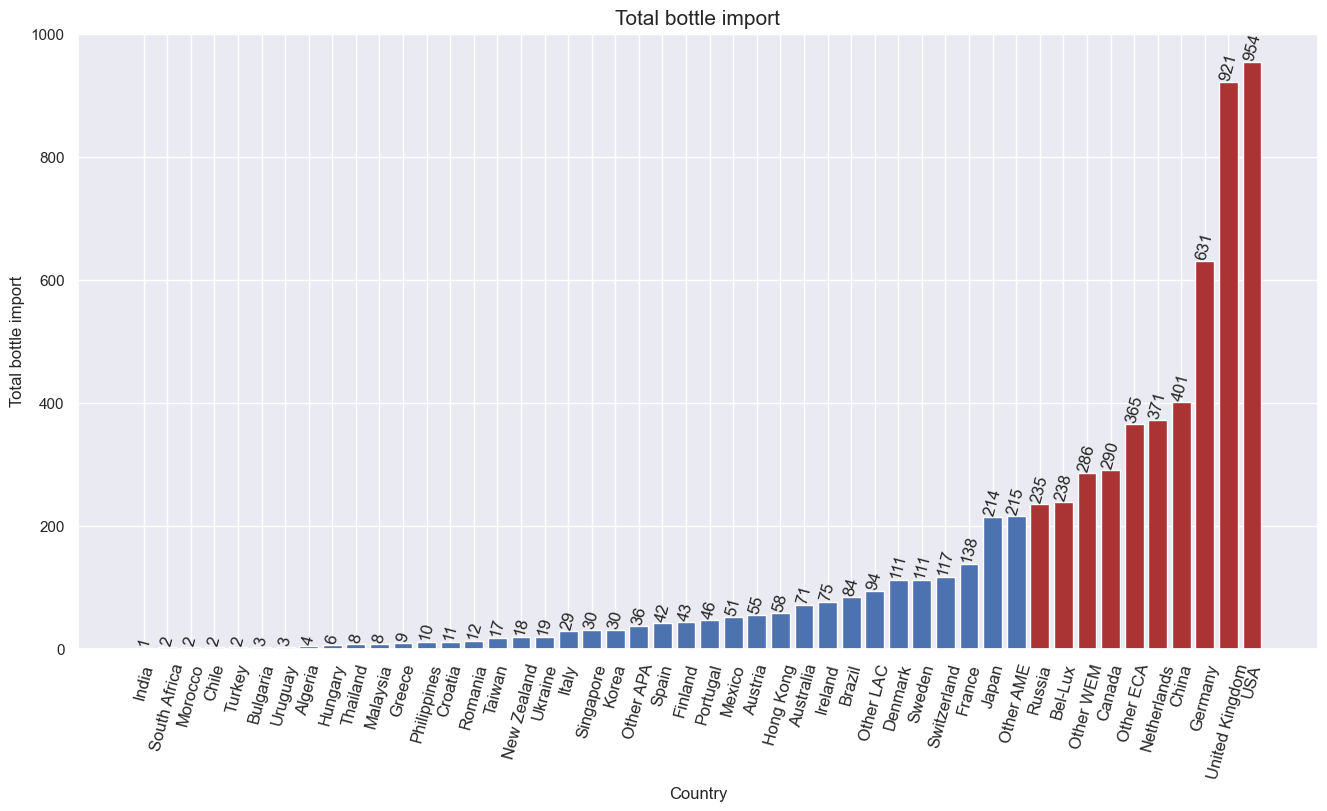

In [189]:
top_10_import = barplot_best_10(wine,'Country','Total bottle import','Country','Total bottle import',10,'Total bottle import')


In [180]:
df1 = wine[wine.columns[27:35]]

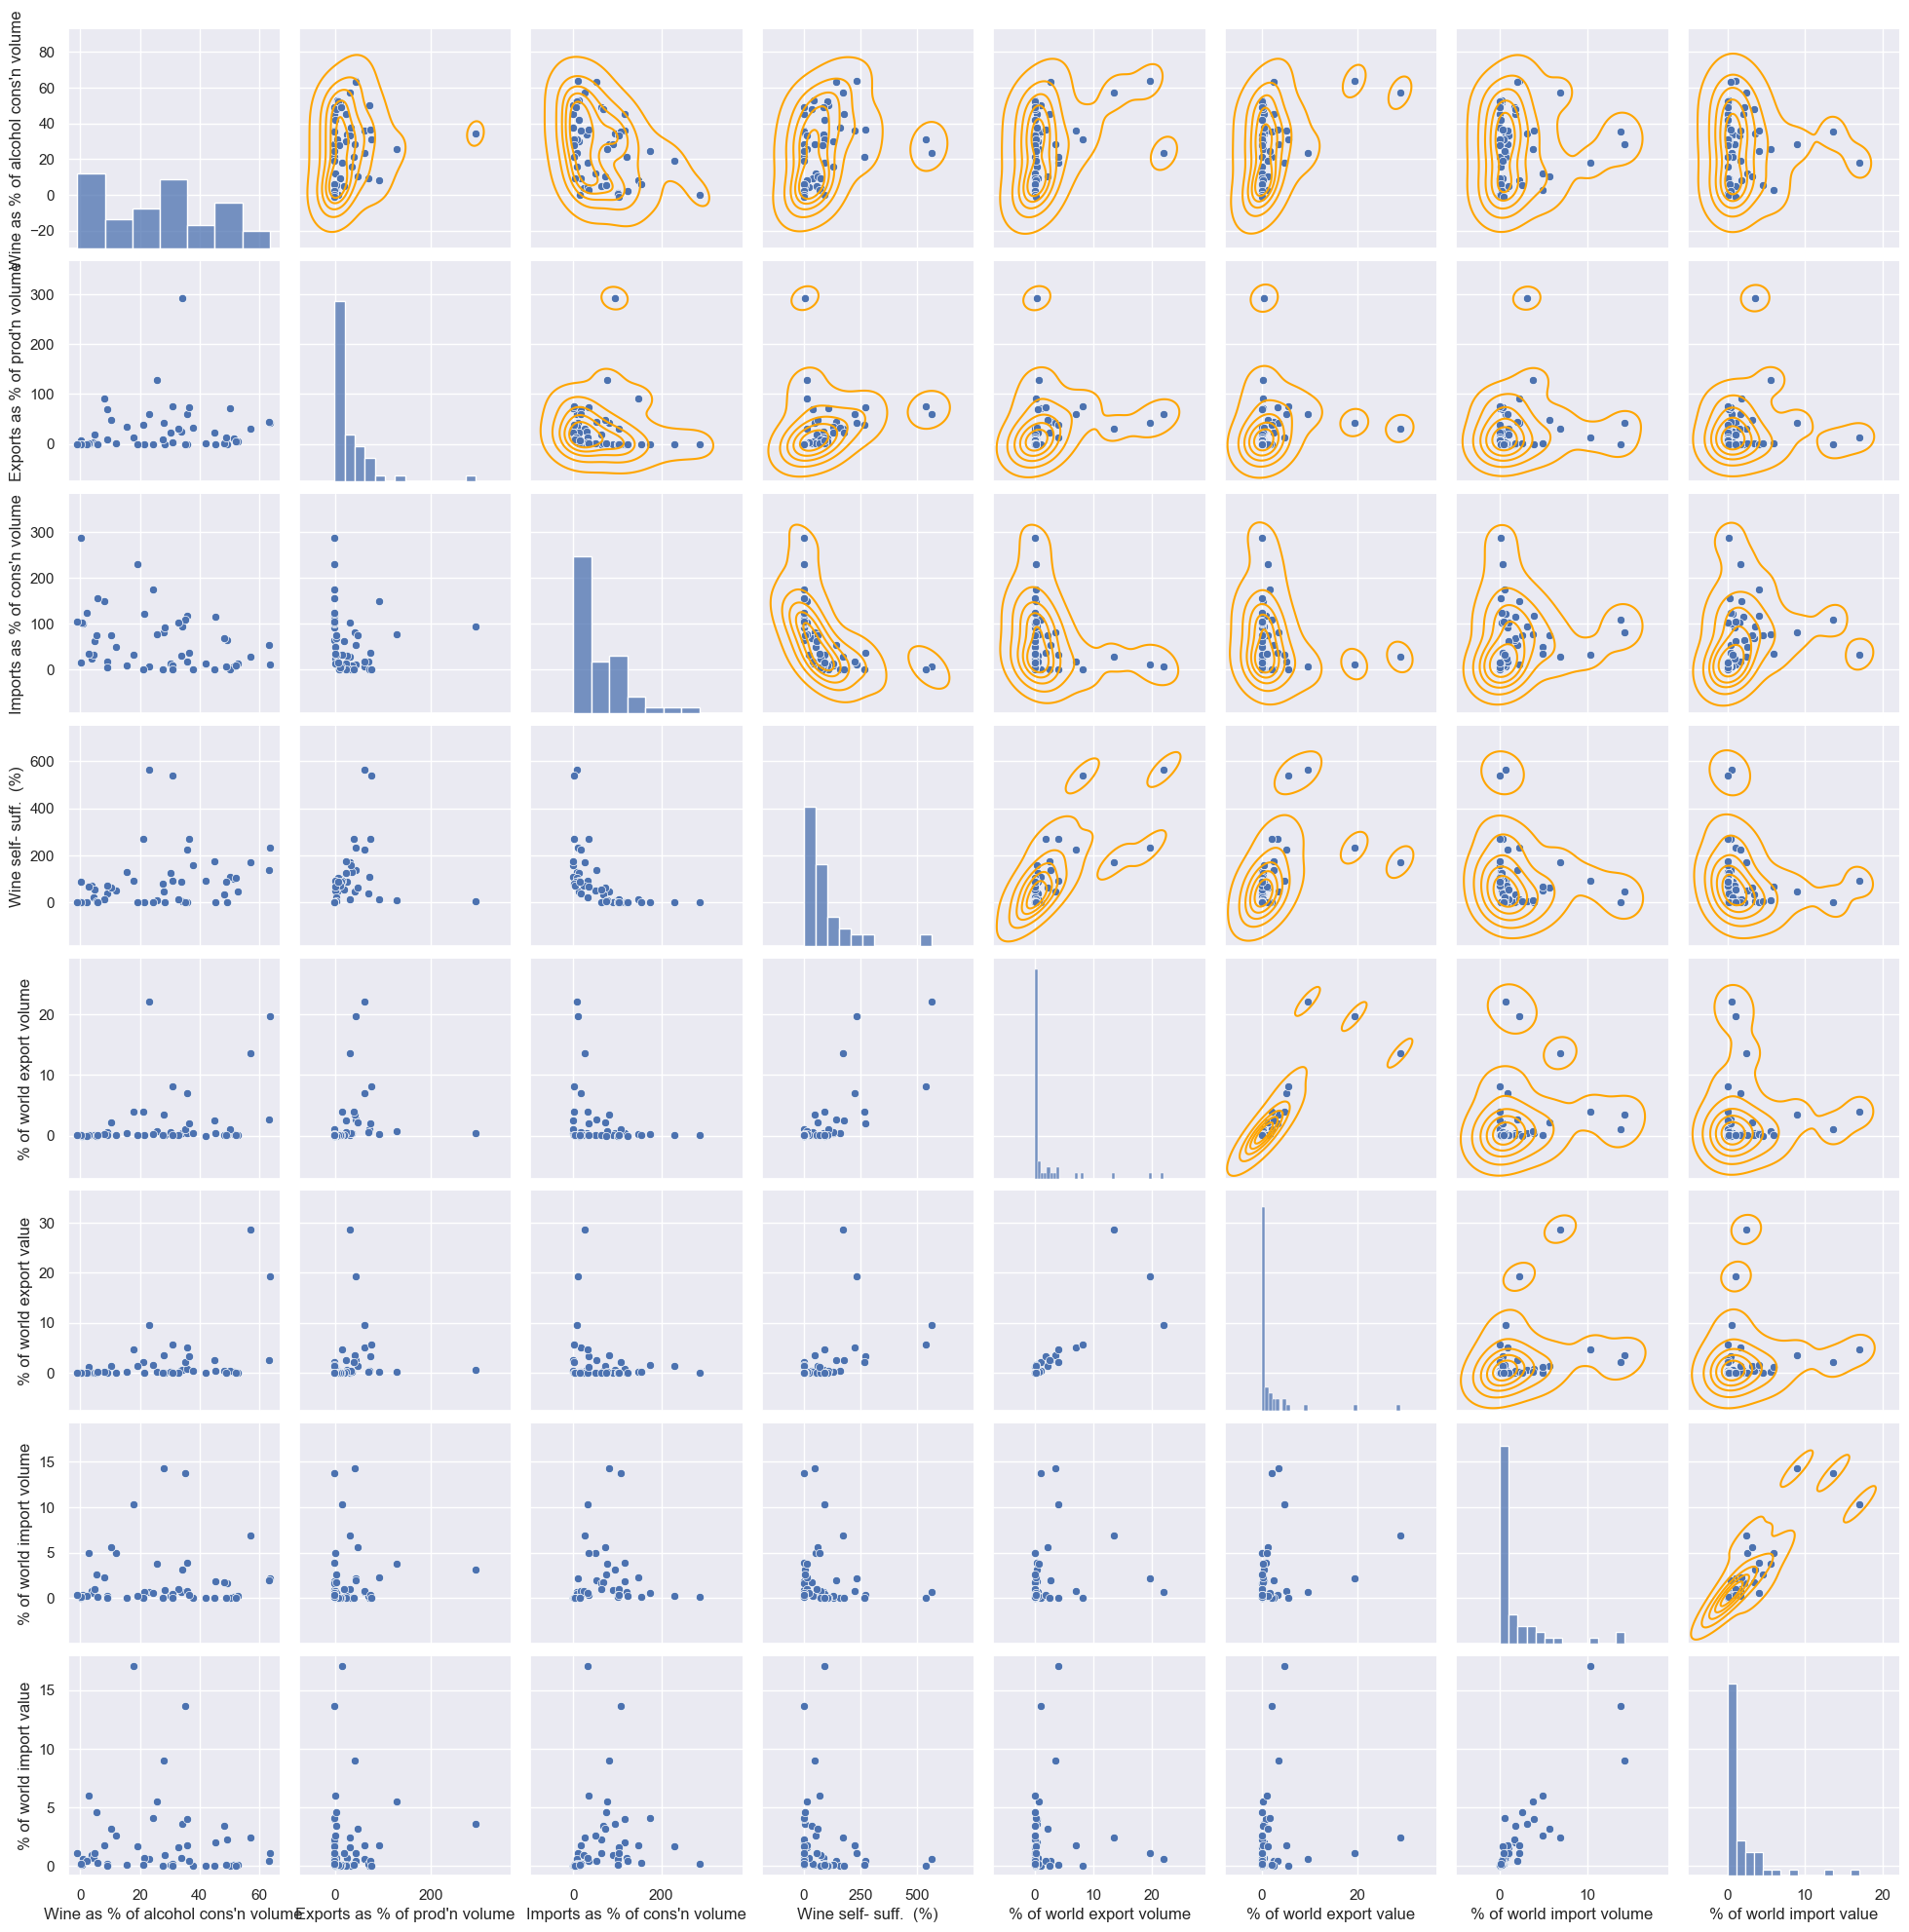

In [181]:
g = sns.pairplot(df1)
g.map_upper(sns.kdeplot, n_levels=6, color='orange')
plt.show()

## 💪 Challenge

Explore the dataset to understand the global wine market. Your published notebook should contain a short report on the state of the market, including summary statistics, visualizations, and text describing any insights you found.